<center><h1>Singh_Vasundhara_HW6</h1></center>

Name: Vasundhara Singh
<br>
Github Username: vasu1406
<br>
USC ID: 7421414643 <br>
Late days used - 2

## 1. Tree-Based Methods

Import packages

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost
from sklearn.model_selection import GridSearchCV as gsCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from statistics import mean
from itertools import chain
import numpy as np
import seaborn as sns
import math
from sklearn import preprocessing as pre

### (a) Download the APS Failure data

In [3]:
le = LabelEncoder()
trainDataFrame = pd.read_csv('../data/aps_failure_training_set.csv',skiprows=20)
trainDataFrame = trainDataFrame.applymap(lambda x: np.nan if x == 'na' else x)
# trainDataFrame[['class']]=trainDataFrame[['class']].apply(le.fit_transform)
label_encoder = pre.LabelEncoder()
trainDataFrame['class'] = label_encoder.fit_transform(trainDataFrame['class'])


# trainDataFrame['class'].value_counts()
testDataFrame = pd.read_csv('../data/aps_failure_test_set.csv',skiprows=20)
testDataFrame = testDataFrame.applymap(lambda x: np.nan if x == 'na' else x)
testDataFrame['class'] = label_encoder.fit_transform(testDataFrame['class'])
# testDataFrame['class'].value_counts()
# testDataFrame[['class']]=testDataFrame[['class']].apply(le.fit_transform)

full_df = pd.concat([trainDataFrame,testDataFrame]).reset_index(drop=True)
full_df['class'].value_counts()

0    74625
1     1375
Name: class, dtype: int64

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

**There are various methods and strategies of Data Imputation. We can use statistical features like mean, median and mode etc to impute for the missing values. I have used Mean to replace the missing values by SimpleImputer. As mean is a very safe replacement and works well with most of the datasets. SimpleImputer is very easy to use and implement. It simply replaces the missing values with some constant values like mean, median etc.**

In [4]:
imputeData = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# # trainDataFrame[['class']]= trainDataFrame[['class']].apply(le.fit_transform)
# trainDataFrame['class'].apply(lambda x: 1 if x=='pos' else 0)
# trainDataFrame = trainDataFrame.applymap(lambda x: np.nan if x == 'na' else x)
# trainDataFrame

trainDataFrame = imputeData.fit_transform(trainDataFrame)
testDataFrame  = imputeData.transform(testDataFrame)

trainDataFrame = pd.DataFrame(trainDataFrame, columns=full_df.columns)
testDataFrame = pd.DataFrame(testDataFrame, columns=full_df.columns)
full_df = pd.concat([trainDataFrame,testDataFrame]).reset_index(drop=True)
# full_df.iloc[:,1:] = imputeData.fit_transform(full_df.iloc[:,1:])
full_df

class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0        0.0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1        0.0  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2        0.0  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3        0.0     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4        0.0  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...      ...      ...       ...           ...            ...     ...     ...   
75995    0.0  81852.0  0.713189  2.130706e+09     892.000000     0.0     0.0   
75996    0.0     18.0  0.000000  5.200000e+01      46.000000     8.0    26.0   
75997    0.0  79636.0  0.713189  1.670000e+03    1518.000000     0.0     0.0   
75998    0.0    110.0  0.713189  3.600000e+01      32.000000     0.0     0.0   
75999    0.0      8.0  0.000000  6.000000e+00       4.000000     2.0     2.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   
...       ...     ...     ...  ...        ...       ...       ...       ...   
75995     0.0     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0   
75996     0.0     0.0     0.0  ...      266.0      44.0      46.0      14.0   
75997     0.0     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0   
75998     0.0     0.0     0.0  ...      588.0     210.0     180.0     544.0   
75999     0.0     0.0     0.0  ...       46.0      10.0      48.0      14.0   

         ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0      339156.0  157956.0   73224.0      0.0     0.0     0.0  
1      133654.0   81140.0   97576.0   1500.0     0.0     0.0  
2      320746.0  158022.0   95128.0    514.0     0.0     0.0  
3          10.0       0.0       0.0      0.0     4.0    32.0  
4      286954.0  311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...       ...      ...     ...     ...  
75995  349840.0  317840.0  960024.0  25566.0     0.0     0.0  
75996       2.0       0.0       0.0      0.0     0.0     0.0  
75997  375498.0  222866.0  358934.0  19548.0     0.0     0.0  
75998    1004.0    1338.0      74.0      0.0     0.0     0.0  
75999      42.0      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 171 columns]

#### (ii) Calculate the coefficient of variation

In [5]:
def printColumnCV(columnsCV):
    for column in columnsCV.index:
        print(column,'=',columnsCV[column])

In [6]:
columnsCV = full_df.iloc[:,1:].apply(lambda x: np.std(x, ddof=1) / np.mean(x), axis=0)
printColumnCV(columnsCV)

aa_000 = 4.328607835435785
ab_000 = 2.2073513688189785
ac_000 = 2.167798419260445
ad_000 = 193.95530718715528
ae_000 = 22.282263017533282
af_000 = 18.196997862898478
ag_000 = 91.35128668547941
ag_001 = 42.17507692605515
ag_002 = 17.64838695085553
ag_003 = 8.75865411085196
ag_004 = 5.476671392312656
ag_005 = 2.96465457460027
ag_006 = 2.352723014917442
ag_007 = 2.8125924060382355
ag_008 = 6.275127504305171
ag_009 = 32.176825735141364
ah_000 = 2.315849827734797
ai_000 = 18.517976823528016
aj_000 = 43.15354342798648
ak_000 = 78.55999294298795
al_000 = 9.115900847568014
am_0 = 9.071049119532328
an_000 = 2.2545157066871493
ao_000 = 2.2763897500138817
ap_000 = 3.0863764309935635
aq_000 = 2.8538979614915445
ar_000 = 10.565227760383186
as_000 = 114.4643812669441
at_000 = 23.19285864625445
au_000 = 86.29358079421576
av_000 = 5.736369744741395
ax_000 = 3.8601916828532317
ay_000 = 40.98793263844955
ay_001 = 49.305160958122165
ay_002 = 38.35678855879416
ay_003 = 28.33426187328432
ay_004 = 33.025194

#### (iii) Plot a correlation matrix

In [7]:
# New
full_df_exceptY = full_df.iloc[:,1:]
correlation = full_df_exceptY.corr()
correlation.style.background_gradient(cmap='viridis')

C:\Users\vasus\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\vasus\anaconda3\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


#### (iv) Make scatter plots and box plots

In [8]:
hightoLowColumnsCV = columnsCV.sort_values(ascending=False)
highestCVfeaturesNumber = math.floor(math.sqrt(170))
highestCVColumns = hightoLowColumnsCV.index[0:highestCVfeaturesNumber]
highestCVColumns

Index(['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'df_000', 'as_000',
       'dh_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009'],
      dtype='object')

**We cannot draw concrete conclusions about the significance of the features just by having a look at the scatterplots. It surely shows some correlation between features, however we can't judge the nature and extent of correlation just by data visualisation.**


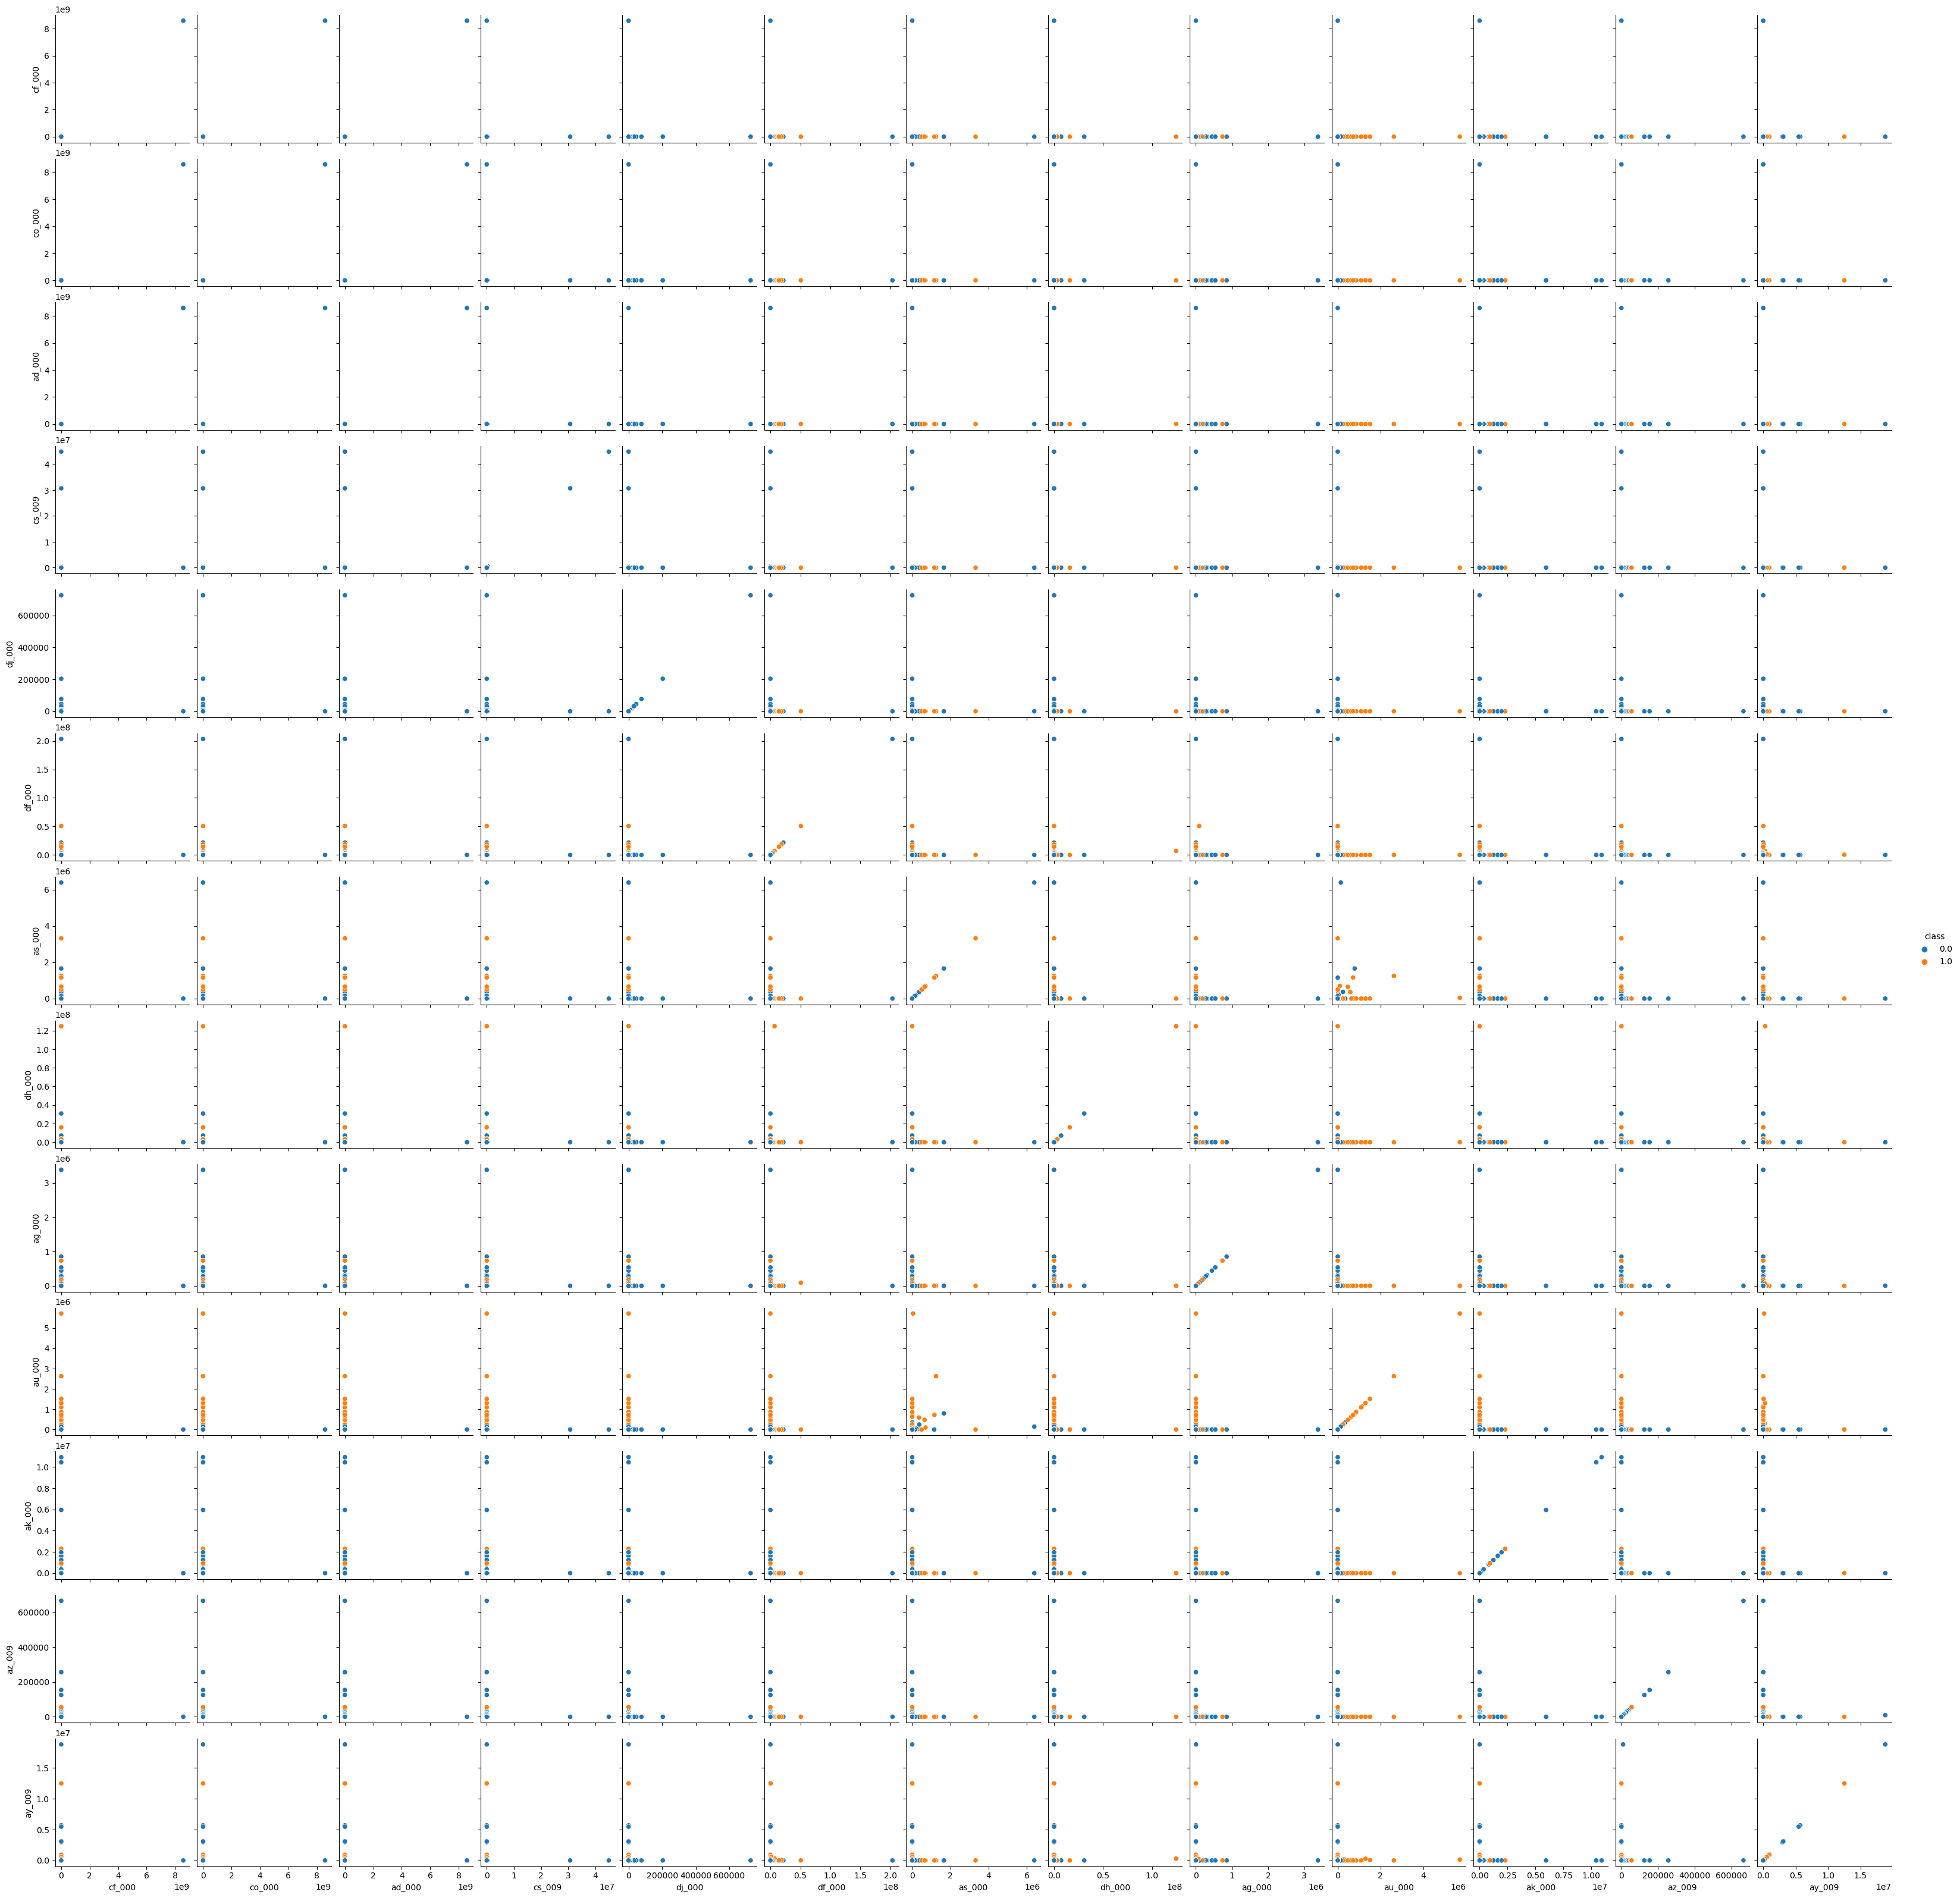

In [9]:
#New
# sns.pairplot(full_df[highestCVColumns].reset_index(drop=True),diag_kind = None)
highestCVColumnsToPlot = highestCVColumns.to_list() + ['class']
sns.pairplot(full_df[highestCVColumnsToPlot],diag_kind = None,hue='class')

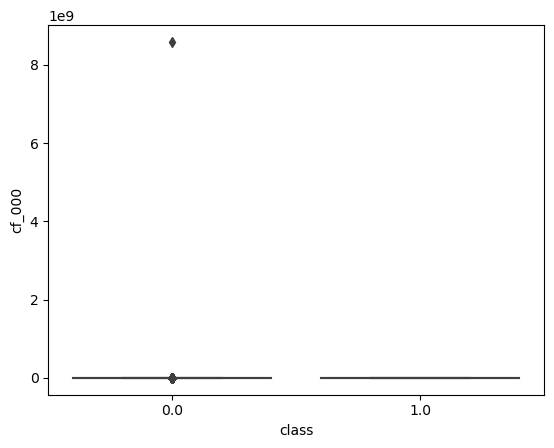

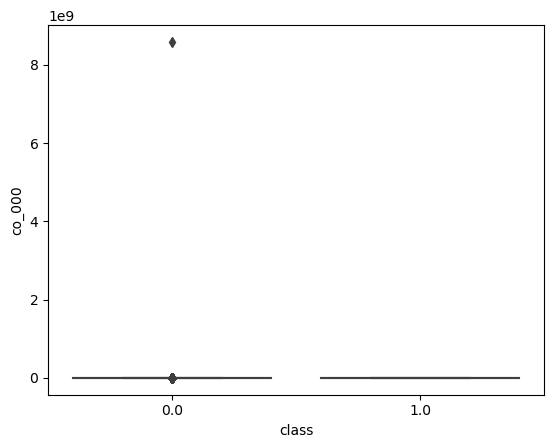

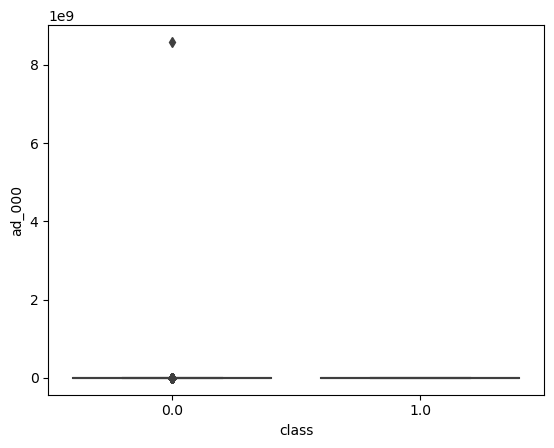

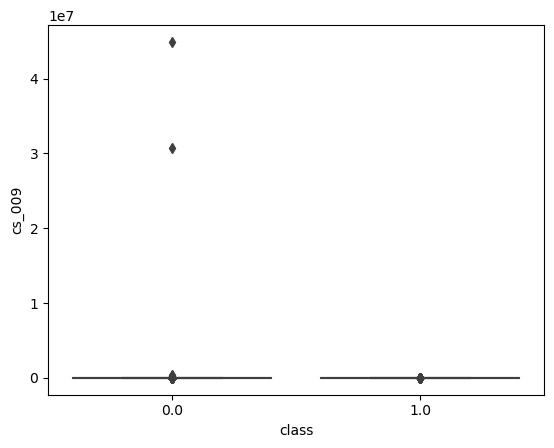

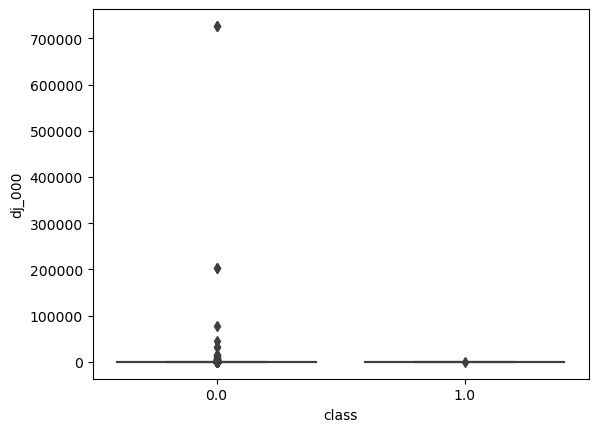

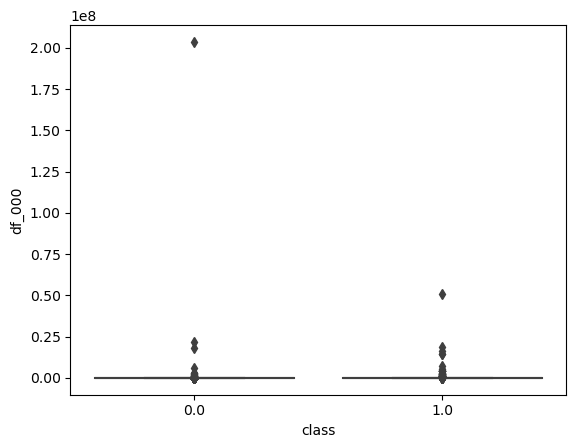

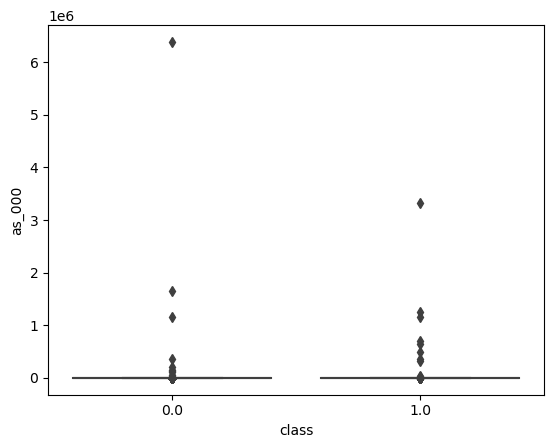

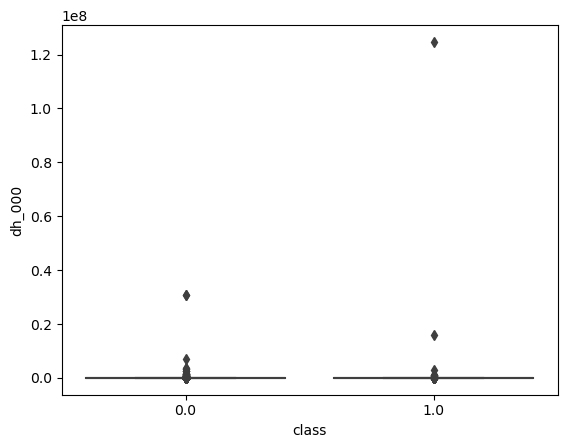

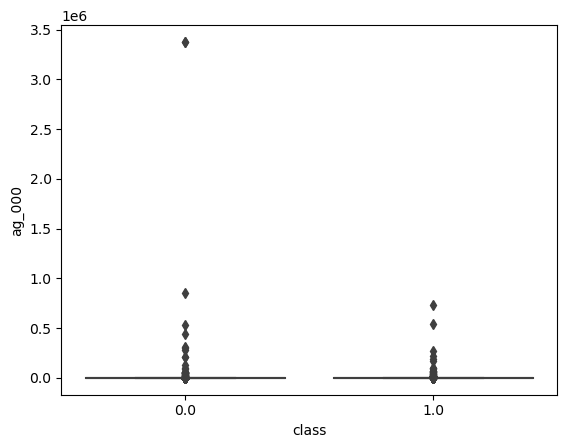

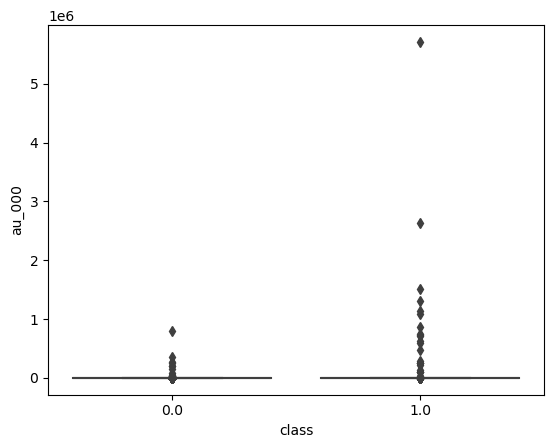

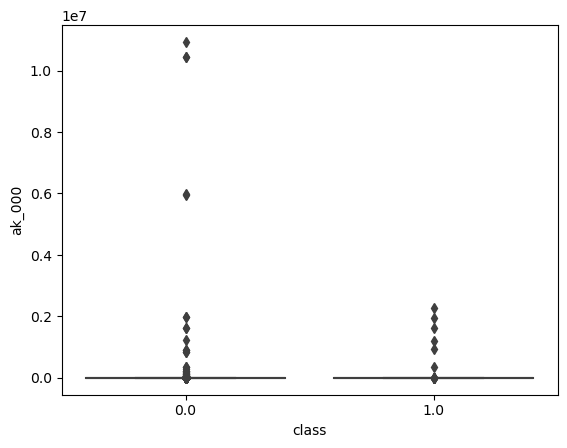

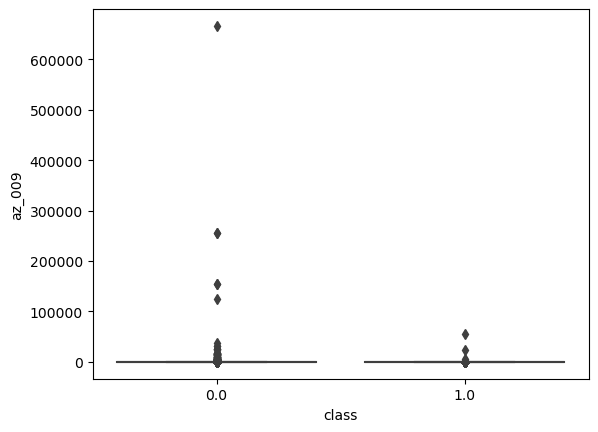

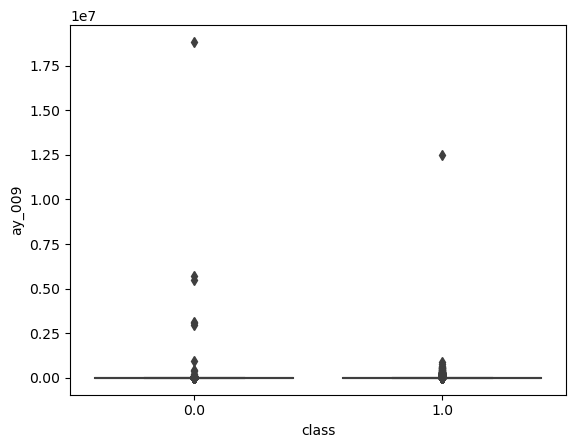

<Figure size 640x480 with 0 Axes>

In [10]:
# matplotlib.rcParams['figure.figsize'] = (25, 10)
#New code
# sns.boxplot(data = full_df[highestCVColumns].reset_index(drop=True))
# plt.show()

for highestCVColumn in highestCVColumns:
    sns.boxplot(data = full_df,y = highestCVColumn,x = 'class')
    plt.figure()

plt.show()

#### (v) Is this data set imbalanced?

**We can clearly see there is a huge imbalance in the data from the number of observations in positive and negative classes printed below**

In [11]:
full_df.groupby('class').size()

class
0.0    74625
1.0     1375
dtype: int64

### (c) Train a random forest

In [12]:
data = full_df.copy()

# data['class'].value_counts()


trainingData = data.iloc[:len(trainDataFrame), :]
# trainingData
testData = data.iloc[len(trainDataFrame):, :]
# testData

trainingX = trainingData.iloc[:,1:]
# trainingX
trainingY = trainingData['class']
# trainingY
# trainingY.value_counts()

testX = testData.iloc[:,1:]
# testX
testY = testData['class']
# testY

In [13]:
classifier = RandomForestClassifier(oob_score = True)
# training
classifier.fit(trainingX,trainingY)

predictedYtrain = classifier.predict(trainingX)
predictedYtrainProb = classifier.predict_proba(trainingX)[:,1]

#test
predictedYTest = classifier.predict(testX)
predictedYTestProb = classifier.predict_proba(testX)[:,1]


<Figure size 200x200 with 0 Axes>

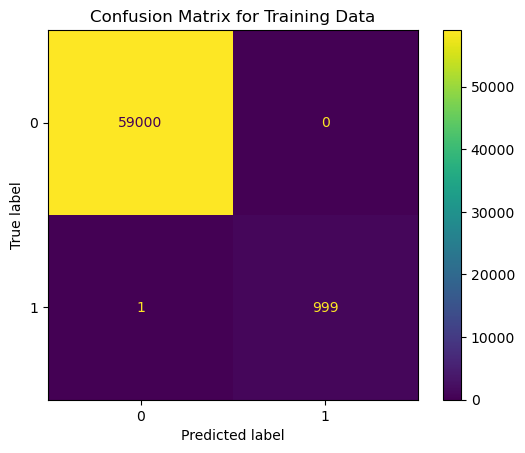

AUC= 1.0
MISCLASSIFICATION ERROR FOR TRAINING DATA= 1.666666666666483e-05


In [14]:
#TRAINING DATA 
# CONFUSION MATRIX
plt.figure(figsize=(2,2))
disp = ConfusionMatrixDisplay(confusion_matrix(trainingY,predictedYtrain))
disp.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

#ROC CURVE
fpr, tpr, thresholds = roc_curve(trainingY, predictedYtrainProb)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Training Data')
print('AUC=',roc_auc_score(trainingY,predictedYtrainProb))

#MISCLASSIFICATION ERROR 
print('MISCLASSIFICATION ERROR FOR TRAINING DATA=',1-accuracy_score(trainingY,predictedYtrain))

**Random forest
The Out of Bag error is 0.006033333333333335
and the Test Error is 0.0078125
The test error is slightly more than the OOB error**

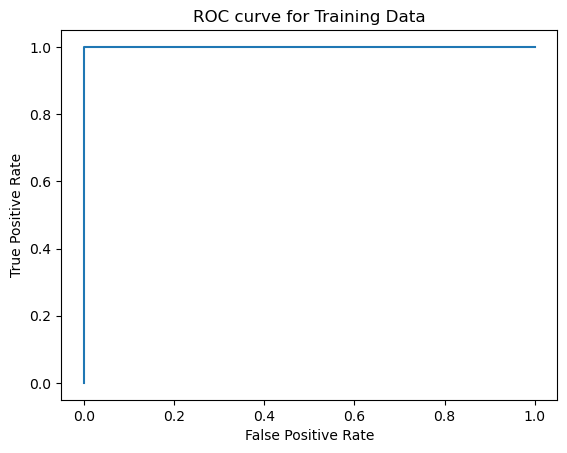

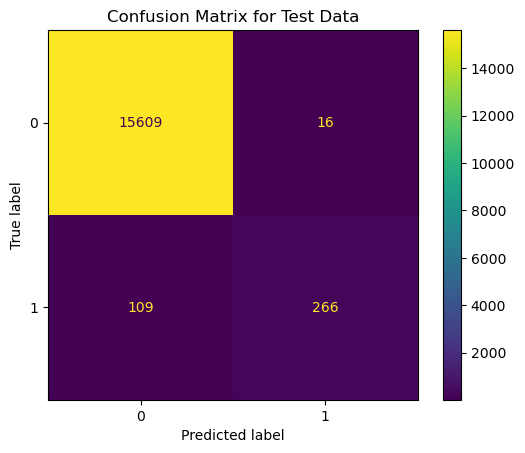

AUC= 0.9915966293333333
MISCLASSIFICATION ERROR FOR TEST DATA= 0.0078125
OOB Error = 0.006033333333333335


In [15]:
#TEST DATA 
# CONFUSION MATRIX
# plt.figure(figsize=(2,2))
disp = ConfusionMatrixDisplay(confusion_matrix(testY,predictedYTest))
disp.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()

#ROC CURVE
fpr, tpr, thresholds = roc_curve(testY, predictedYTestProb)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Test Data')
print('AUC=',roc_auc_score(testY,predictedYTestProb))

#MISCLASSIFICATION ERROR 
print('MISCLASSIFICATION ERROR FOR TEST DATA=',1 - accuracy_score(testY,predictedYTest))

#OOB ERROR
print('OOB Error =', 1 - classifier.oob_score_)

### (d) Research class imbalance in random forest


**Random forest Imbalanced:-
The Out of Bag error is 0.006033333333333335
and the Test Error is 0.0078125
AUC - 0.9915966293333333
The test error is slightly more than the OOB error**

**Random Forest with Balanced Dataset - 
AUC= 0.9933442560000001
MISCLASSIFICATION ERROR FOR TEST DATA= 0.010812500000000003
OOB Error = 0.007616666666666716
The test error here also is more than the OOB error**

**The test error with balanced dataset is more than the test error we got without balancing the dataset. The OOB error also increased after balancing the data**

In [16]:
classifier = RandomForestClassifier(oob_score = True,class_weight='balanced')
# training
classifier.fit(trainingX,trainingY)

predictedYtrain = classifier.predict(trainingX)
predictedYtrainProb = classifier.predict_proba(trainingX)[:,1]

#test
predictedYTest = classifier.predict(testX)
predictedYTestProb = classifier.predict_proba(testX)[:,1]


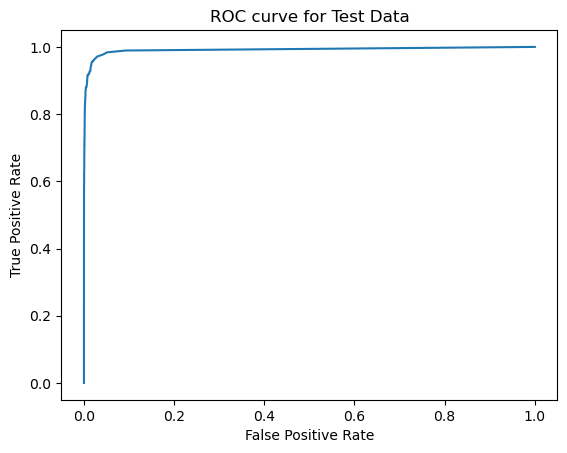

<Figure size 200x200 with 0 Axes>

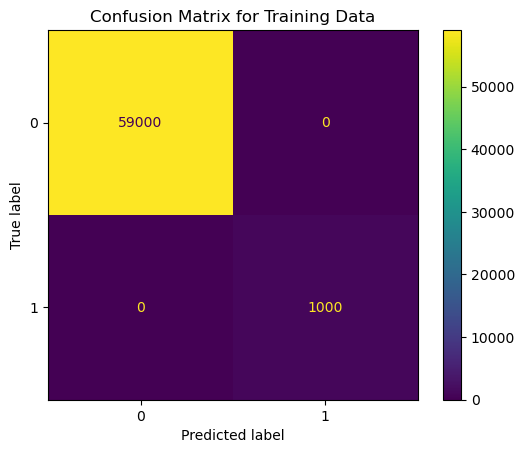

AUC= 1.0
MISCLASSIFICATION ERROR FOR TRAINING DATA= 0.0


In [17]:
#TRAINING DATA 
# CONFUSION MATRIX
plt.figure(figsize=(2,2))
disp = ConfusionMatrixDisplay(confusion_matrix(trainingY,predictedYtrain))
disp.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

#ROC CURVE
fpr, tpr, thresholds = roc_curve(trainingY, predictedYtrainProb)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Training Data')
print('AUC=',roc_auc_score(trainingY,predictedYtrainProb))

#MISCLASSIFICATION ERROR 
print('MISCLASSIFICATION ERROR FOR TRAINING DATA=',1-accuracy_score(trainingY,predictedYtrain))

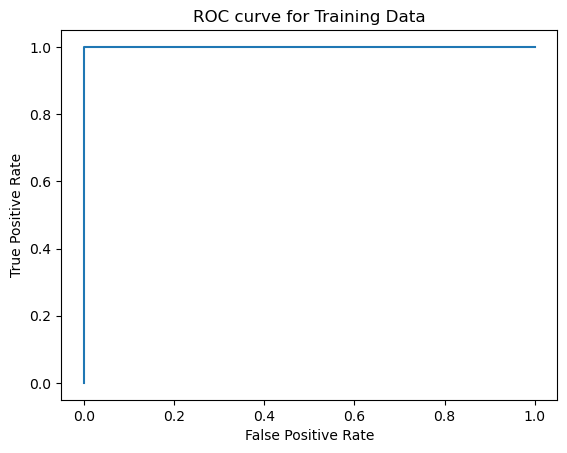

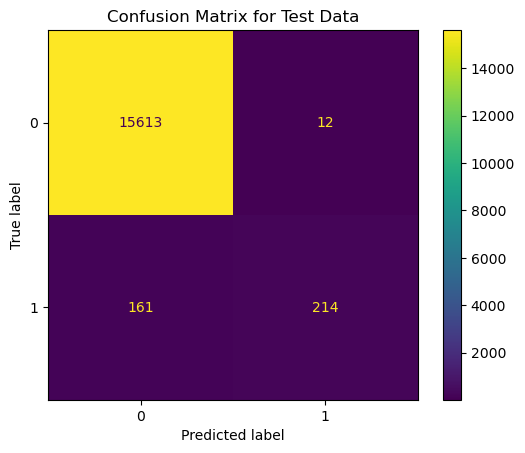

AUC= 0.9933442560000001
MISCLASSIFICATION ERROR FOR TEST DATA= 0.010812500000000003
OOB Error = 0.007616666666666716


In [18]:
#TEST DATA 
# CONFUSION MATRIX
# plt.figure(figsize=(2,2))
disp = ConfusionMatrixDisplay(confusion_matrix(testY,predictedYTest))
disp.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()

#ROC CURVE
fpr, tpr, thresholds = roc_curve(testY, predictedYTestProb)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Test Data')
print('AUC=',roc_auc_score(testY,predictedYTestProb))

#MISCLASSIFICATION ERROR 
print('MISCLASSIFICATION ERROR FOR TEST DATA=',1 - accuracy_score(testY,predictedYTest))

#OOB ERROR
print('OOB Error =', 1 - classifier.oob_score_)

### (e) XGBoost and Model Trees

**Using 5 fold, 10 fold, and leave-one-out cross validation methods
the Cross Validation Error = 0.005199999999999982**
**The test error = 0.00593750000000004. Both the values are comparable, however the test error is slightly greater than the cross validation error**

In [19]:
# alpha_list = list(chain([10**i for i in range(-4, 4)], [i/100 for i in range(25, 1000, 25)]))

alpha_list = [10**i for i in range(-4,4)]
alpha_dict = {'reg_alpha':alpha_list}

xgbClassifier = xgboost.XGBClassifier(objective = 'reg:logistic')

gridSearchCV = gsCV(xgbClassifier, alpha_dict)
gridSearchCV.fit(trainingX,trainingY)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_c

In [20]:
display(gridSearchCV.best_params_)
# print(grid_cv.best_params_)
print(gridSearchCV.best_score_)
print('Cross Validation error :' ,1-gridSearchCV.best_score_)

{'reg_alpha': 0.0001}

0.9948
Cross Validation error : 0.005199999999999982


In [21]:
bestXGB = gridSearchCV.best_estimator_
bestXGB.fit(trainingX,trainingY)

predictedYTrain = bestXGB.predict(trainingX)
predictedYTrainProb = bestXGB.predict_proba(trainingX)[:,1]

predictedYTest = bestXGB.predict(testX)
predictedYTestProb = bestXGB.predict_proba(testX)[:,1]

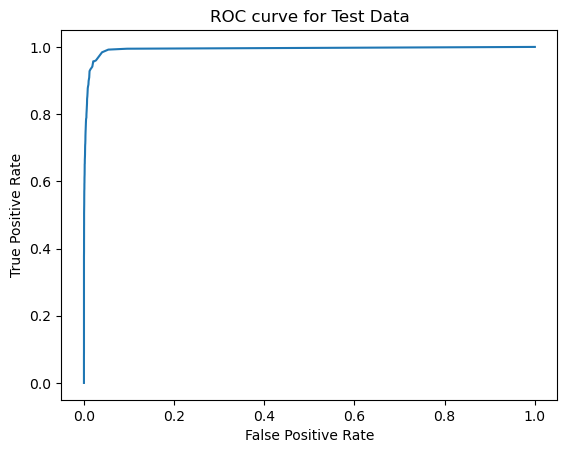

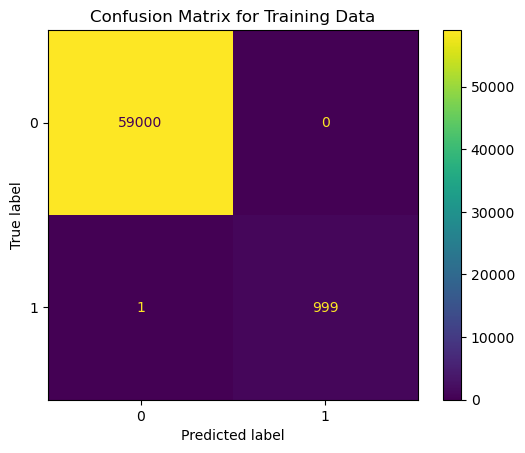

AUC= 0.9999999830508475
MISCLASSIFICATION ERROR FOR TRAINING DATA= 1.666666666666483e-05


In [22]:
#TRAINING DATA 
# CONFUSION MATRIX
# plt.figure(figsize=(2,2))
disp = ConfusionMatrixDisplay(confusion_matrix(trainingY,predictedYTrain))
disp.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

#ROC CURVE
fpr, tpr, thresholds = roc_curve(trainingY, predictedYTrainProb)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Training Data')
print('AUC=',roc_auc_score(trainingY,predictedYTrainProb))

#MISCLASSIFICATION ERROR 
print('MISCLASSIFICATION ERROR FOR TRAINING DATA=',1-accuracy_score(trainingY,predictedYTrain))

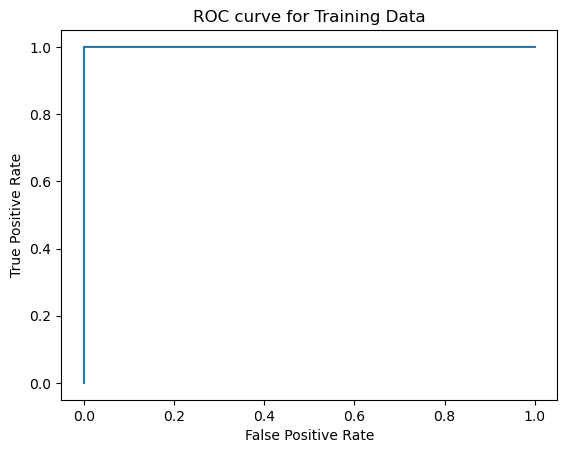

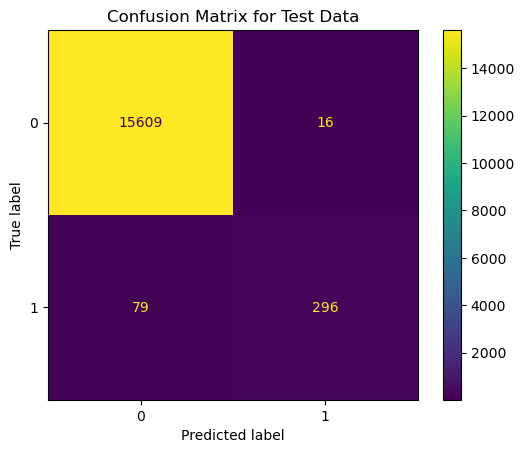

AUC= 0.9950537386666667
MISCLASSIFICATION ERROR FOR TEST DATA= 0.00593750000000004


In [23]:
#TEST DATA 
# CONFUSION MATRIX
# plt.figure(figsize=(2,2))
disp = ConfusionMatrixDisplay(confusion_matrix(testY,predictedYTest))
disp.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()

#ROC CURVE
fpr, tpr, thresholds = roc_curve(testY, predictedYTestProb)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Test Data')
print('AUC=',roc_auc_score(testY,predictedYTestProb))

#MISCLASSIFICATION ERROR 
print('MISCLASSIFICATION ERROR FOR TEST DATA=',1 - accuracy_score(testY,predictedYTest))

### (f) Use SMOTE to pre-process your data

**To manage the class imbalance, it is recommended to use SMOTE during cross-validation by applying SMOTE only to the training folds and leaving the validation fold untouched. This is the correct approach to implement SMOTE during cross-validation.**

**In the case of class imbalance, using SMOTE to balance the data might be a good idea. However, it is important to note that even though the uncompensated case has a lower test error than the compensated case, the confusion matrix shows more classifications to the smaller class. Thus, it might be necessary to consider using SMOTE to address this imbalance.**

**The test error is slightly higher than the validation error.**

**MISCLASSIFICATION ERROR FOR TEST DATA AFTER SMOTE = 0.006624999999999992
AUC AFTER SMOTE = 0.9948898986666667
CV ERROR = 0.00635
MISCLASSIFICATION ERROR FOR TEST DATA BEFORE SMOTE = 0.00593750000000004
AUC BEFORE SMOTE = 0.9950537386666667**

**The test error after SMOTE has increased.**

In [24]:
def run_kfold_with_smote(X_train, y_train, alpha_list, n_splits = 5):
    kf = KFold(n_splits = n_splits, shuffle=True, random_state=42)
    results = {}
    
    for alpha in alpha_list:
        cv_score = []
        print(f'alpha={alpha}')
        for fold, (train_index, test_index) in enumerate(kf.split(X_train), 1):
            X_train_fold, y_train_fold = X_train.iloc[train_index,:], y_train.iloc[train_index]
            X_test_fold, y_test_fold = X_train.iloc[test_index,:], y_train.iloc[test_index]  

            X_train_oversampled, y_train_oversampled = oversample_with_smote(X_train_fold, y_train_fold)
            
            model = xgboost.XGBClassifier(objective='reg:logistic', reg_alpha = alpha)
            model.fit(X_train_oversampled, y_train_oversampled)
            
            y_pred = model.predict(X_test_fold)
            cv_score.append(accuracy_score(y_test_fold, y_pred))
            
            print(f'For fold {fold}:')
            print(f'Accuracy: {accuracy_score(y_test_fold, y_pred)}')
            print(f'f-score: {f1_score(y_test_fold, y_pred)}')
            
        results[alpha] = cv_score
        print(f'alpha={alpha}, cv score={mean(cv_score)}')
        
    return results

def oversample_with_smote(X_train, y_train):
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    return X_train_oversampled, y_train_oversampled


In [25]:
# the cv_scores for the best alpha can be found in the result
alpha_list = [10**i for i in range(-4,4)]
results = run_kfold_with_smote(trainingX, trainingY, alpha_list, n_splits = 5)

alpha=0.0001
For fold 1:
Accuracy: 0.9921666666666666
f-score: 0.7803738317757009
For fold 2:
Accuracy: 0.9945
f-score: 0.835
For fold 3:
Accuracy: 0.9930833333333333
f-score: 0.7980535279805353
For fold 4:
Accuracy: 0.9944166666666666
f-score: 0.8194070080862532
For fold 5:
Accuracy: 0.9926666666666667
f-score: 0.7934272300469484
alpha=0.0001, cv score=0.9933666666666666
alpha=0.001
For fold 1:
Accuracy: 0.99175
f-score: 0.7692307692307692
For fold 2:
Accuracy: 0.9940833333333333
f-score: 0.8193384223918575
For fold 3:
Accuracy: 0.9933333333333333
f-score: 0.8058252427184466
For fold 4:
Accuracy: 0.99475
f-score: 0.830188679245283
For fold 5:
Accuracy: 0.9935
f-score: 0.8115942028985507
alpha=0.001, cv score=0.9934833333333334
alpha=0.01
For fold 1:
Accuracy: 0.9920833333333333
f-score: 0.7806004618937643
For fold 2:
Accuracy: 0.9938333333333333
f-score: 0.814070351758794
For fold 3:
Accuracy: 0.994
f-score: 0.8235294117647058
For fold 4:
Accuracy: 0.9944166666666666
f-score: 0.819407

**Best alpha = 0.1 found above with highest cv_Score of 0.9936499999999999**

In [26]:
bestXGBSmote = xgboost.XGBClassifier(objective='reg:logistic',reg_alpha = 0.1)

sm = SMOTE()
trainingXOverSampled, trainingYOverSampled = sm.fit_resample(trainingX,trainingY)
bestXGBSmote.fit(trainingXOverSampled,trainingYOverSampled)

predictedYTrainSmote = bestXGBSmote.predict(trainingX)
predictedYTrainProbSmote = bestXGBSmote.predict_proba(trainingX)[:,1]

predictedYTestSmote = bestXGBSmote.predict(testX)
predictedYTestProbSmote = bestXGBSmote.predict_proba(testX)[:,1]

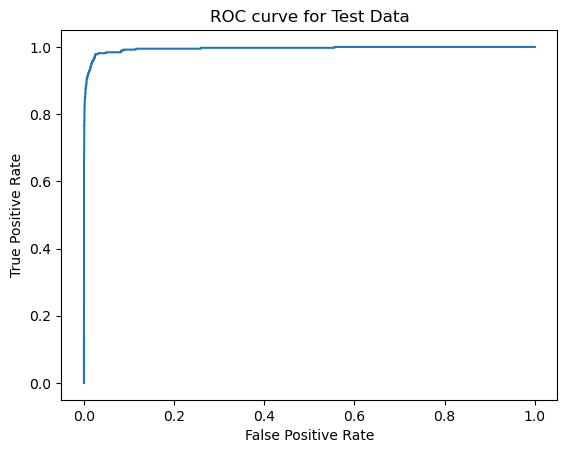

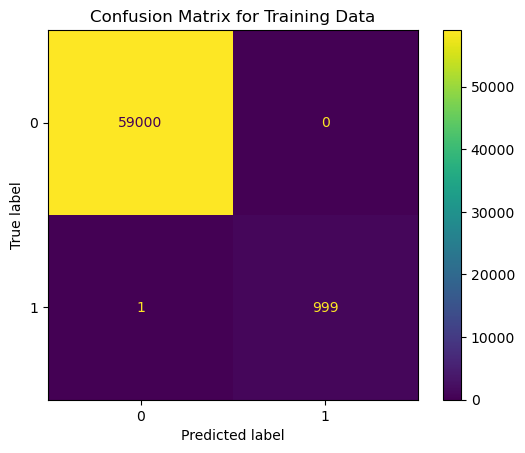

AUC= 0.9999998644067797
MISCLASSIFICATION ERROR FOR TRAINING DATA= 1.666666666666483e-05


In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix(trainingY,predictedYTrainSmote))
disp.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

#ROC CURVE
fpr, tpr, thresholds = roc_curve(trainingY, predictedYTrainProbSmote)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Training Data')
print('AUC=',roc_auc_score(trainingY,predictedYTrainProbSmote))

#MISCLASSIFICATION ERROR 
print('MISCLASSIFICATION ERROR FOR TRAINING DATA=',1 - accuracy_score(trainingY,predictedYTrainSmote))

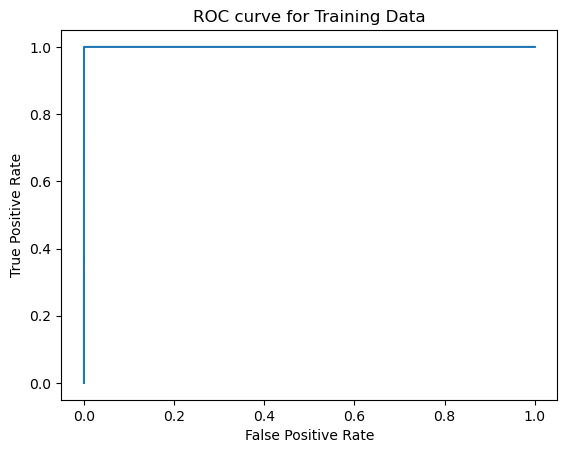

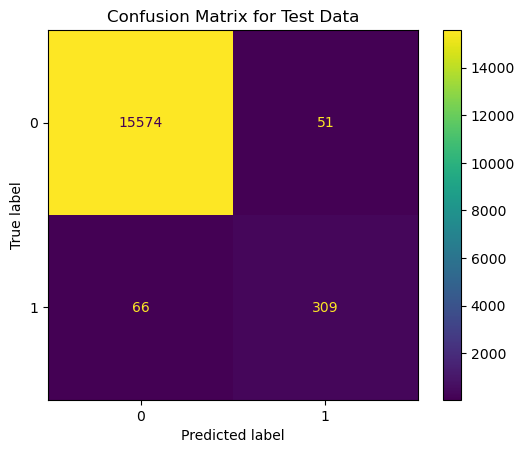

AUC= 0.9937133226666667
MISCLASSIFICATION ERROR FOR TEST DATA= 0.007312500000000055


In [28]:
#TEST DATA 
# CONFUSION MATRIX
# plt.figure(figsize=(2,2))
disp = ConfusionMatrixDisplay(confusion_matrix(testY,predictedYTestSmote))
disp.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()

#ROC CURVE
fpr, tpr, thresholds = roc_curve(testY, predictedYTestProbSmote)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Test Data')
print('AUC=',roc_auc_score(testY,predictedYTestProbSmote))

#MISCLASSIFICATION ERROR 
print('MISCLASSIFICATION ERROR FOR TEST DATA=',1 - accuracy_score(testY,predictedYTestSmote))

## 2. ISLR 6.6.3

a)  Ans - iv) Steadily Decrease.


Increasing the value of s in the model leads to a gradual reduction in the training error. When s is set to 0, there is a significant amount of error due to all the Bi values being 0. As s is increased, the Bi values also increase and eventually stabilize at a value that corresponds to the least square error. The model will eventually overfit on the training data, where all Bi values have some non-zero value, resulting in the least possible training error.

b) Ans - ii) Decrease initially, and then eventually start increasing in a U shape

Initially, as we increase the value of s from 0, the test error decreases, but after reaching a certain point, it starts increasing in a U shape. With an increase in s, the coefficients (Bi) in the model begin to take on some values, causing a drop in the test error. However, if we keep increasing the value of s, the model becomes more complex, allowing more coefficients to take values and leading to overfitting on the training data.

c) Ans iii) - Steadily increase

When s is 0, the model is a constant model, and the variance is 0. However, as s increases, the model becomes more flexible because more coefficients (Bi) take on values, leading to an increase in variance. Thus, the variance steadily increases as the model becomes more complex.

d) Ans iv) Steadily Decrease.


The square bias of the model constantly decreases as s increases. When s is 0, the model predicts a constant value, resulting in high bias. However, as more coefficients (Bi) are included in the model, the bias decreases. As the model becomes more complex and overfits the data, the bias continues to decrease even further.

e) Ans v) Remains Constant


The irreducible error remains constant and does not depend on any model or hyperparameters, including s. Regardless of the complexity of the model or the value of s, the irreducible error remains the same.

## 3. ISLR 6.6.5

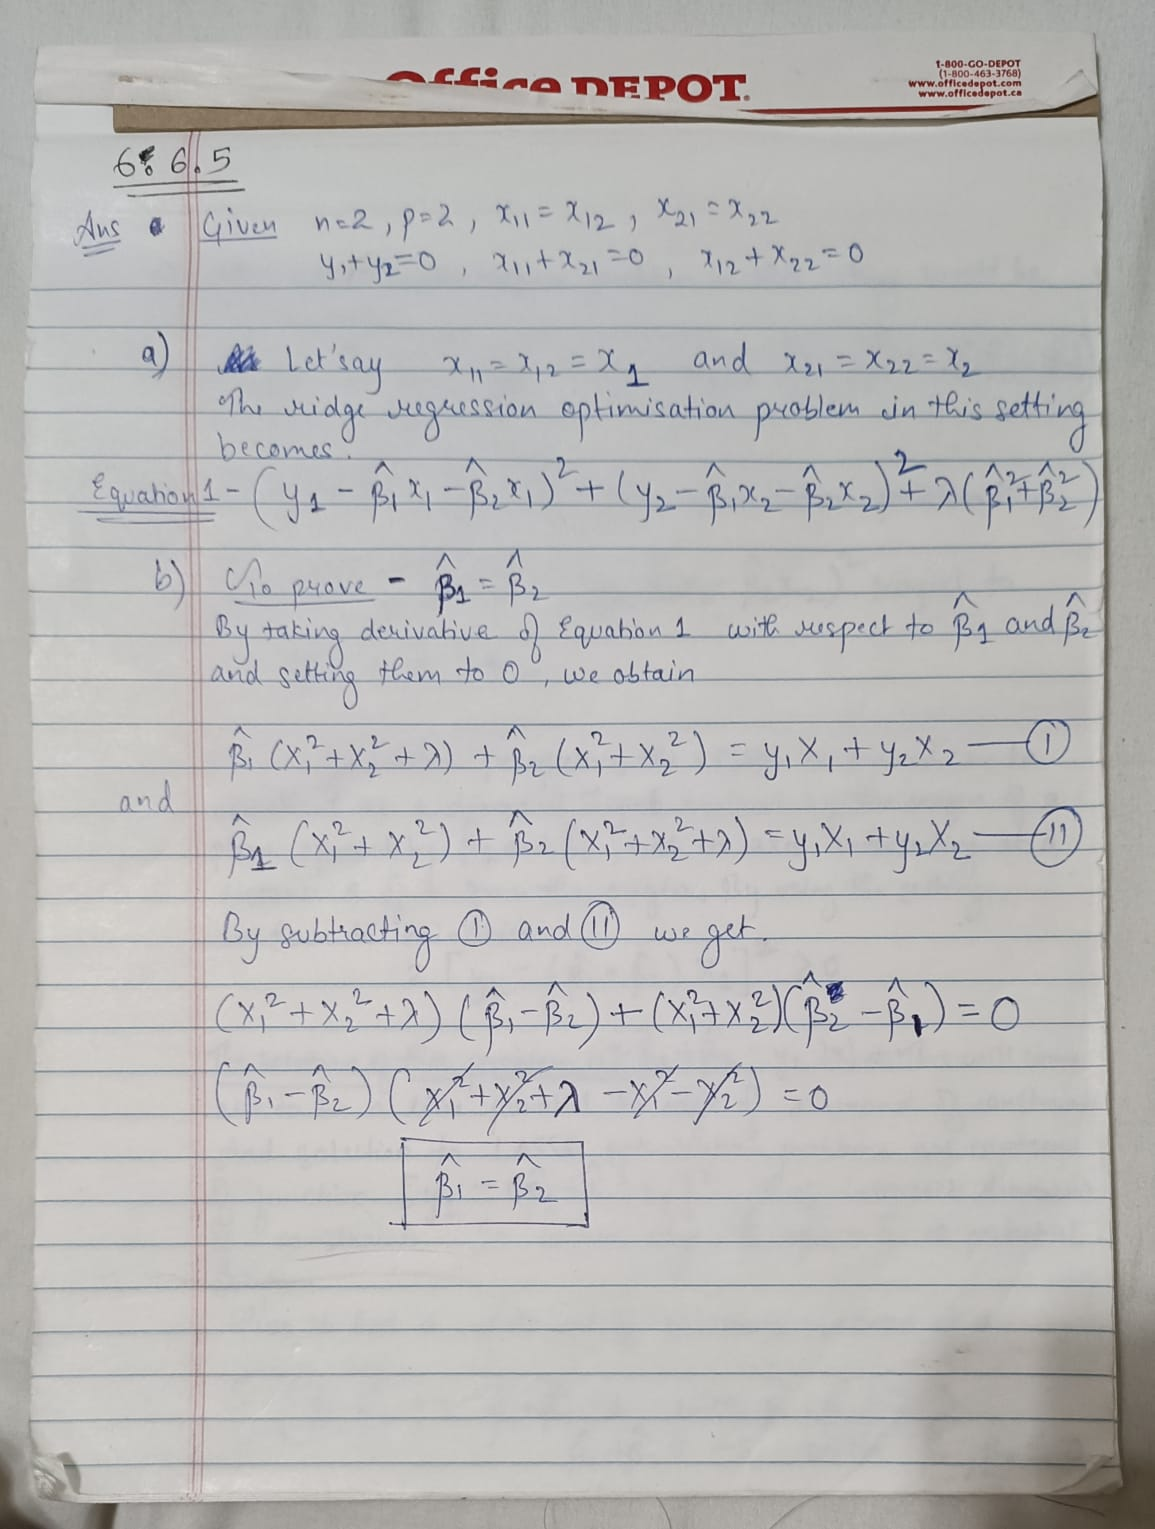

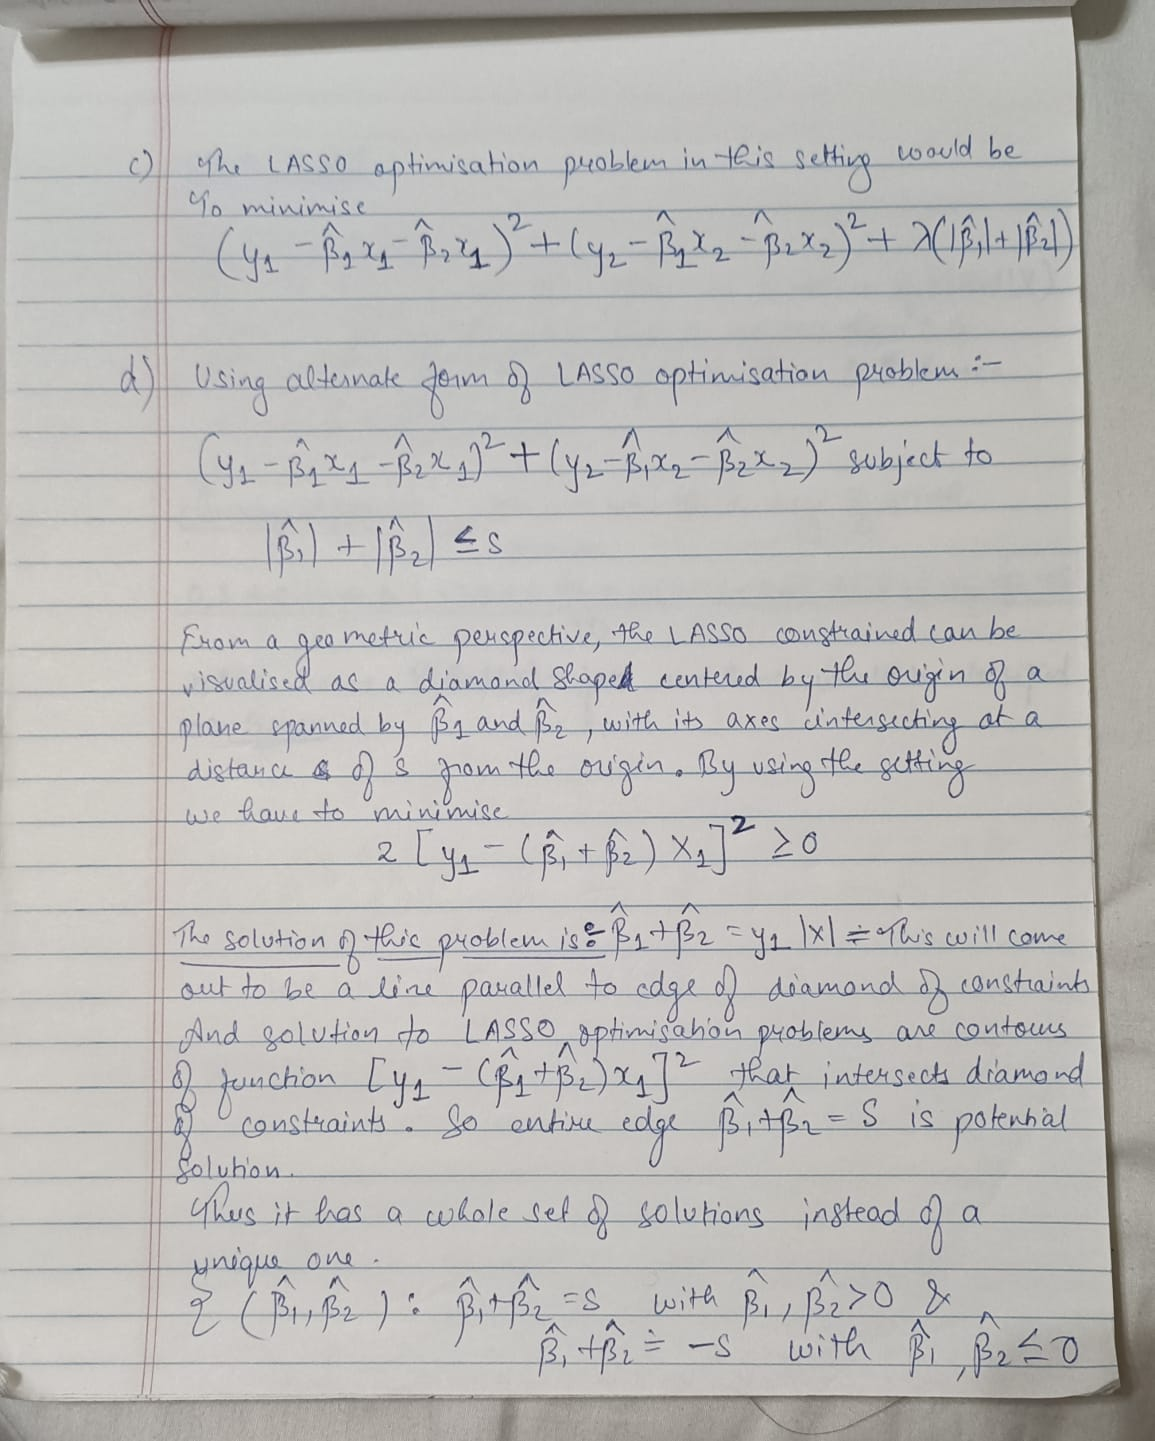

## 4. ISLR 8.4.5

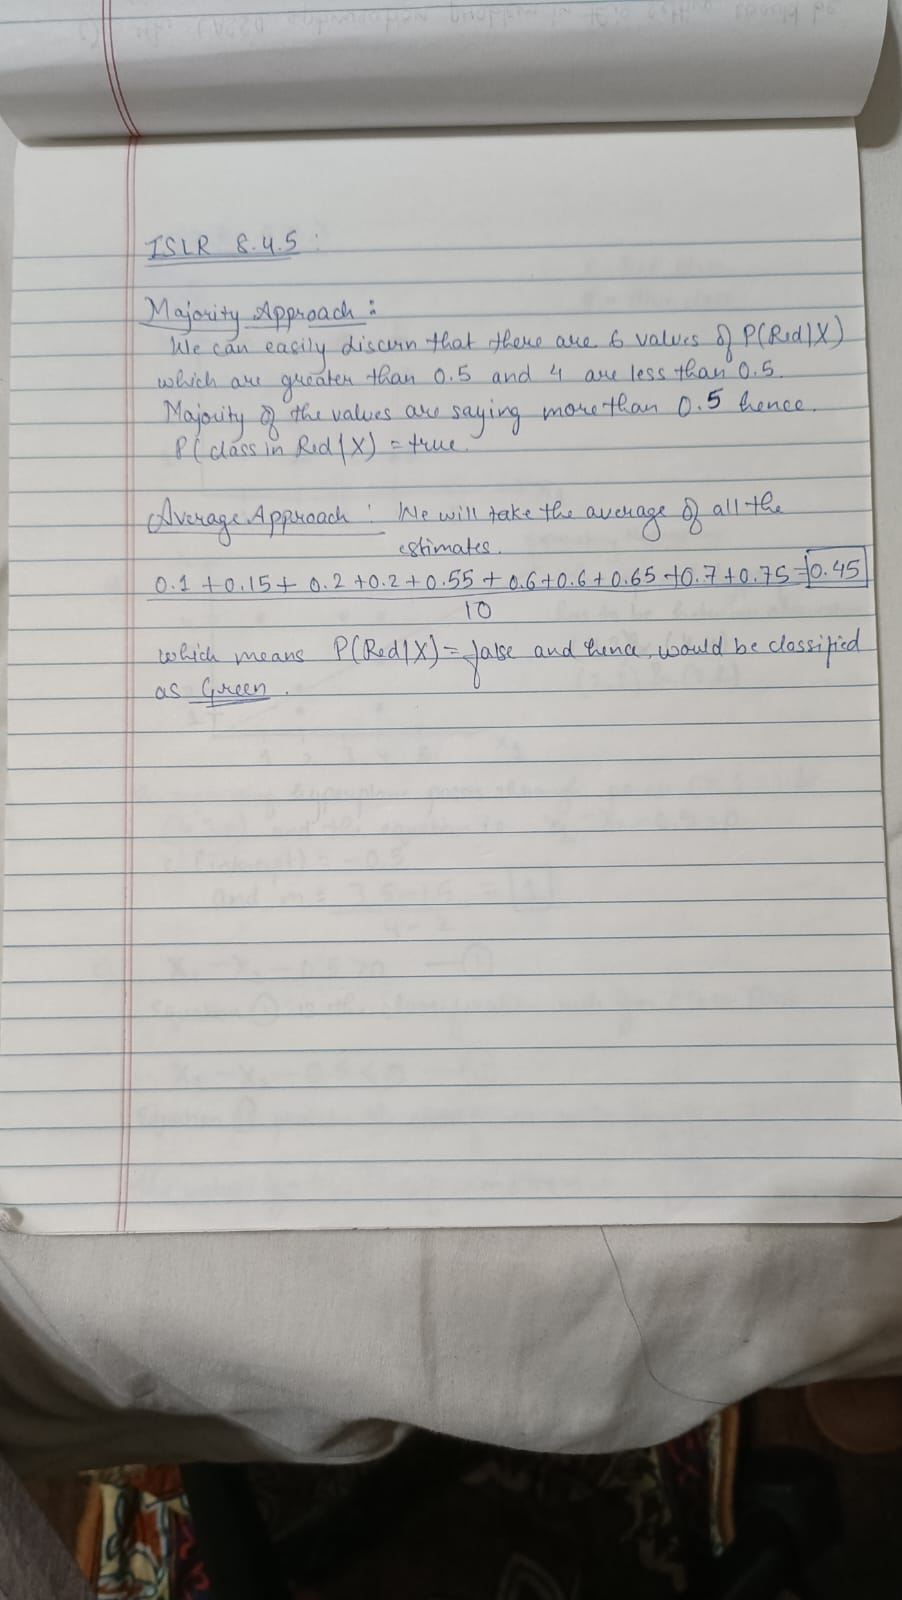

## 5. ISLR 9.7.3

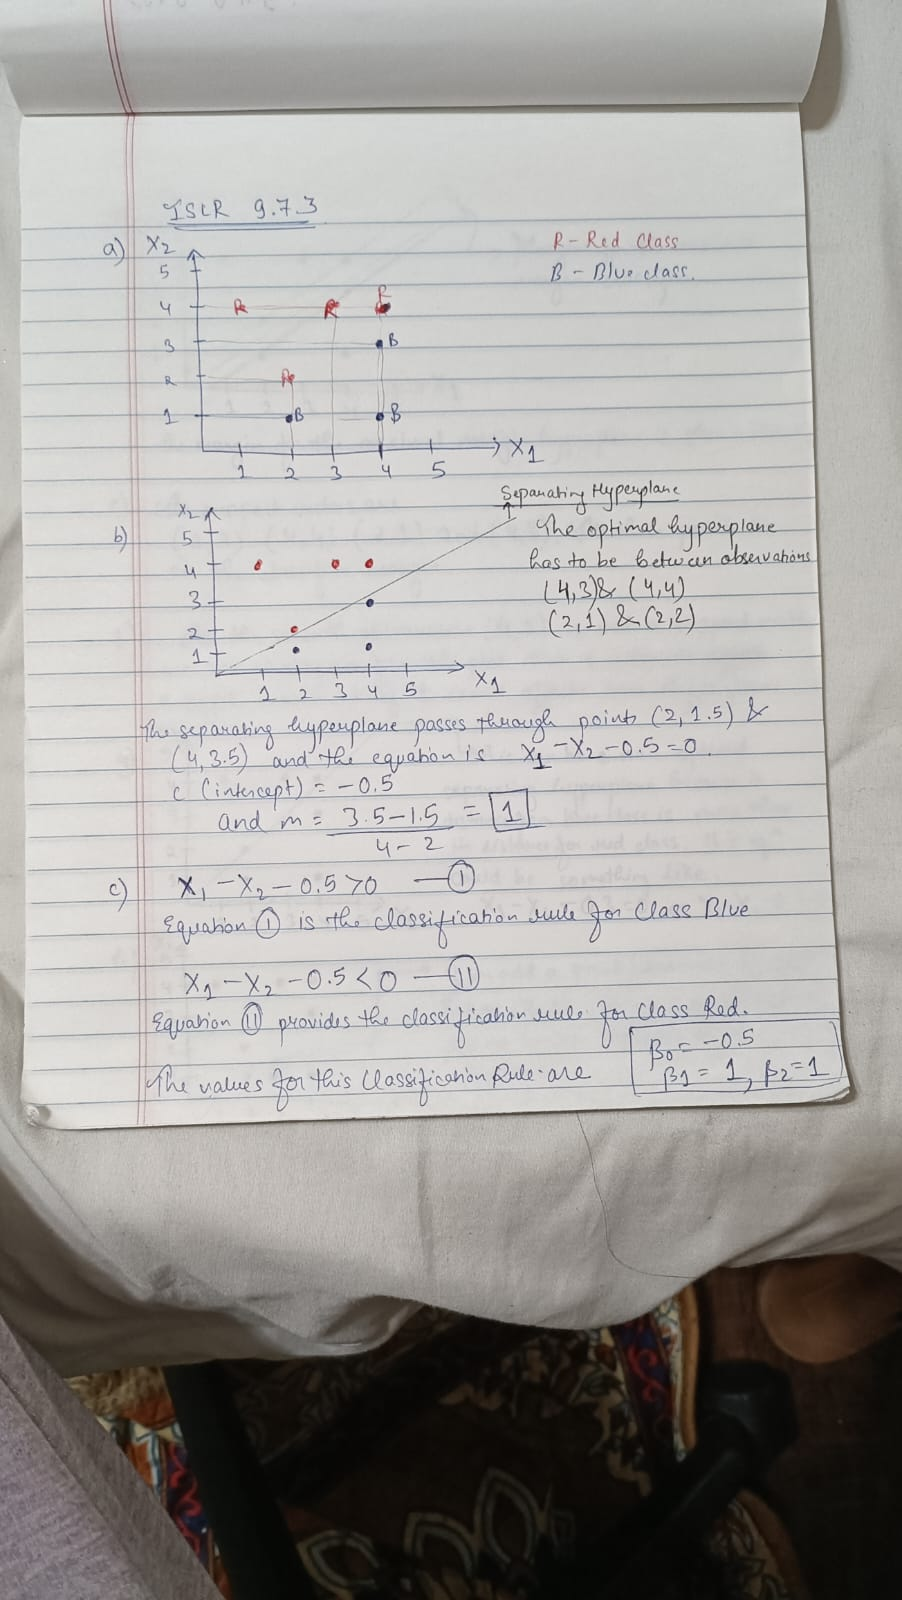

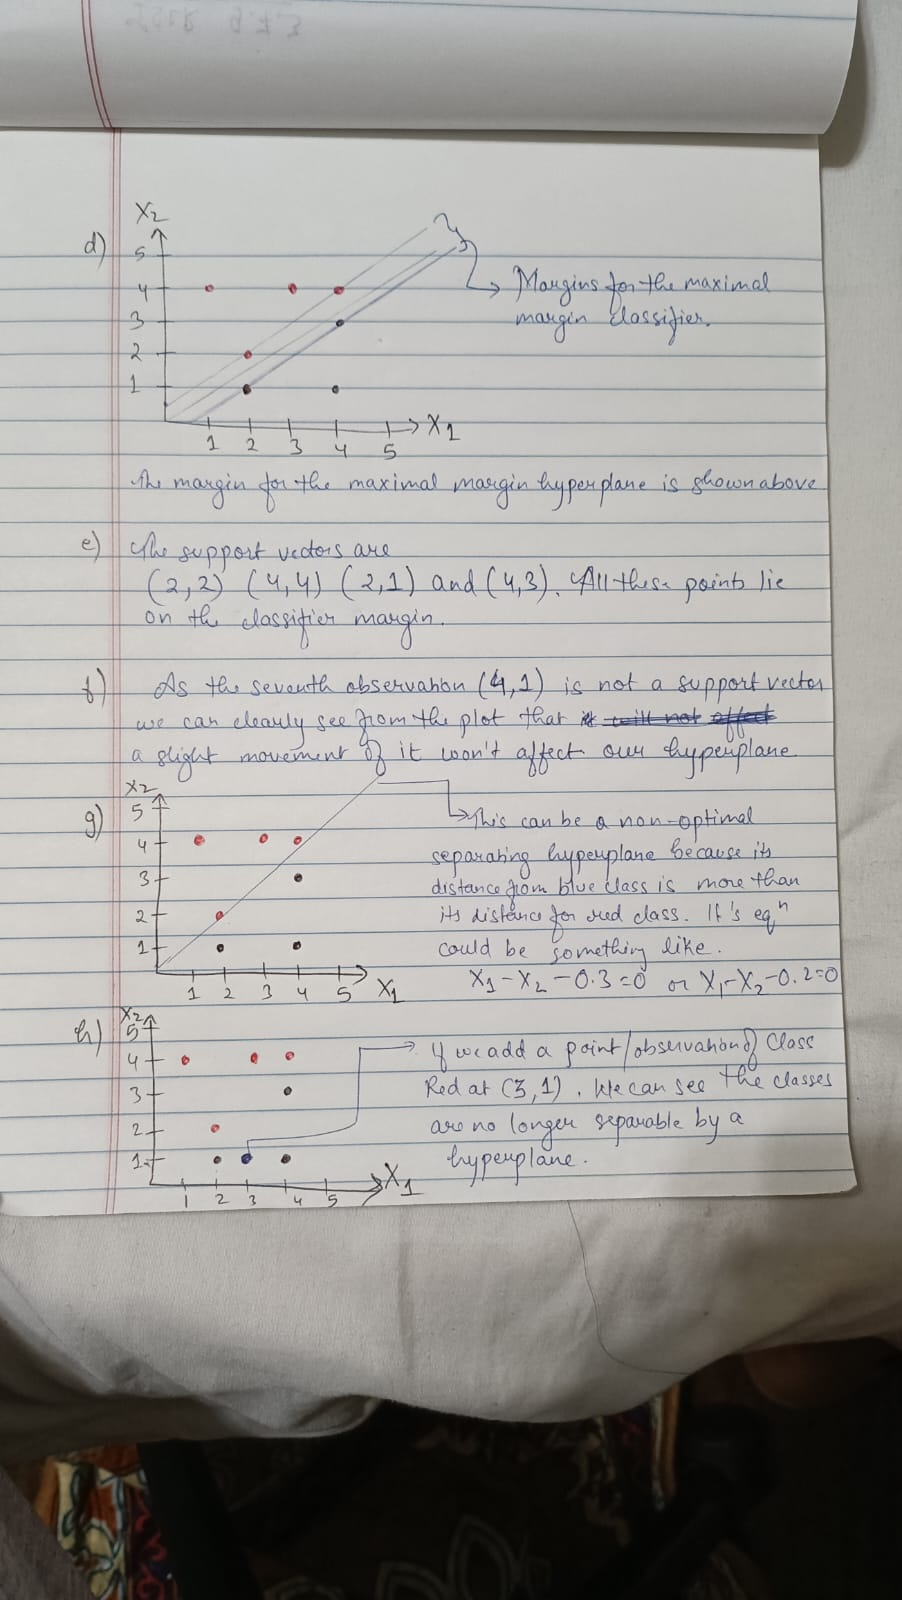